# KMeans

For the case study, we try to discover meaningful customer groups for market segmentation. 

### Import Python libraries

In [3]:
# import libraries

import pandas as pd
from sklearn.cluster import KMeans

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

### Load and verify data

Next, we load and verify the data. Although there are four columns, we only use *Income* and *Score* for clustering. *Income* is the customer's personal income. *Score* is an indexed score of how much the customer spends at the mall. 

In [4]:
df = pd.read_csv("data/mallcustomers.csv")
df.head()

,Gender,Age,Income,Score
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


### Run K-Means

Next, we run $K$-Means with $k$ (number of clusters) set at $k=5$. 

In [5]:
X = df[['Score','Income']]
km = KMeans(n_clusters=5).fit(X)

In [6]:
results = km.predict(X)
clusters = pd.DataFrame(results,columns=['cluster'])

In [7]:
df_c = X.join(clusters, how='outer')
df_c.head()

,Score,Income,cluster
0,39,15,4
1,81,15,3
2,6,16,4
3,77,16,3
4,40,17,4


In [8]:
category = {0:'Enthusiastic', 1:'Conservative', 
            2:'Middle-of-the-Road', 3:'Browsers',4:'Luxury'}

In [9]:
df_c['cat'] = df_c['cluster']
df_c = df_c.replace({'cat':category})

### Display Results

<AxesSubplot:xlabel='Income', ylabel='Score'>

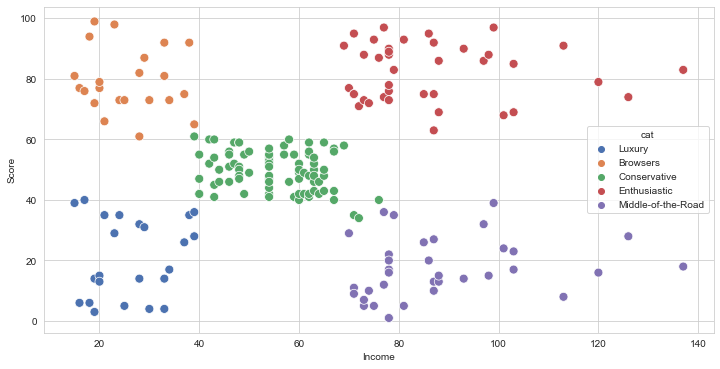

In [12]:
plt.figure(figsize=(12,6))
sns.scatterplot(x="Income",y="Score",data=df_c,hue="cat",
                palette="deep", s=80)